# Lista de Exercícios IV

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 12/03/2021

In [1]:
import matplotlib.pyplot as plt
import vpython as vp
import random as rd
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>

## Problema 1

### Letra a)

Vamos gerar e imprimir dois números aleatórios no intervalo de 1 até 6:

In [2]:
a = rd.randint(1,6)
b = rd.randint(1,6)

print('1º rolamento :', format(a))
print('2º rolamento :', format(b))

1º rolamento : 5
2º rolamento : 3


### Letra b)

Vamos agora simular o rolamento de dois dados não viciados um milhão de vezes e contar o número de vezes que obtemos um duplo seis:

In [3]:
count = 0

for i in range(1000000):
    a = rd.randint(1,6)
    b = rd.randint(1,6)
    if a==6 and b==6:
        count += 1

Agora vamos determinar a fração de vezes que obtemos um duplo seis em nossa simulação:

In [4]:
prob = count/1e6
print('A fração de vezes em que foi obtido um duplo 6 foi de :', format(prob))

A fração de vezes em que foi obtido um duplo 6 foi de : 0.027631


Note que nosso resultado, apesar de não ser exatamente igual é bem próximo do valor de $\frac{1}{36}\approx0.2\overline{7}$.

$\text{ }$

## Problema 2

### Letras a), b) e c)

Neste problema ao invés de resolver os itens separadamente, vamos resolver todos de uma vez, uma vez que os trechos de códigos para a resolução de cada item são análogos e pertencem todos a um mesmo loop.

1) Primeiramente, vamos determinar a probabilidade de cada átomo de $^{209}\text{Pb}$ decair ou não, em sequência. A duração de cada fatia do tempo será $\delta t=1$ s. Para isso, vamos começar definindo os valores iniciais e em seguida definir a probabilidade $p(t)$ de um único átomo decair num intervalo de tempo de comprimento $t$ que é dado pela fórmula:

$$\boxed{p(t)=1-2^{-t/\tau}}$$

onde $\tau$ representa a o tempo de meia-vida do elemento em análise.

Iremos realizar as seguintes etapas:

* Contaremos o número total de átomos que decai;
* Subtraímos o número de átomos de $^{209}\text{Pb}$;
* Adicionamos o ao número de átomos de $^{209}\text{Bi}$.

2) Em seguida, vamos realizar o mesmo procedimento para o $^{209}\text{Ti}$, exceto para os átomos que decaem que são subtraídos do total de $^{209}\text{Tl}$ e adicionados ao total de $^{209}\text{Pb}$.

3.1) Depois, iremos contar o número de átomos de $^{213}\text{Bi}$ que decai por rota.

3.2) Por fim, vamos plotar os decaimentos dos isótopos em análise. Como de costume, definimos uma função para melhorar um pouco a estética dos plots:

Vamos começar definindo as constantes que usaremos ao longo do problema, bem como os arrays que servirão para armazenar os dados que calcularemos posteriormente:

In [5]:
rd.random()

# Passo temporal:
h = 1 

# Valores iniciais de cada isótopo:
Bi209 = 0
Pb209 = 0
Ti209 = 0
Bi213 = 10000

# Probabilidades de cada átomo:
pPb = 1 - 2**(-h/3.3/60)
pTi = 1 - 2**(-h/2.2/60)
pBi = 1 - 2**(-h/46/60)

# Arrays vazios para armazenar os dados calculados:
Bi209_list = []
Pb209_list = []
Ti209_list = []
Bi213_list = []

Agora implementamos os loops:

In [6]:
t = np.arange(0,2e4,h)
for ti in t:
    Bi209_list.append(Bi209)
    Pb209_list.append(Pb209)
    Ti209_list.append(Ti209)
    Bi213_list.append(Bi213)
    
    for i in range(Pb209):
        if rd.random() < pPb:
            Pb209 -= 1
            Bi209 += 1
    
    for i in range(Ti209):
        if rd.random() < pTi:
            Ti209 -= 1
            Pb209 += 1
    
    for i in range(Bi213):
        if rd.random() < pBi:
            Bi213 -= 1
            if rd.random() < 0.9791:
                Pb209 += 1
            else:
                Ti209 += 1

Como de costume, definimos nossa função para melhorar um pouco a estética dos nossos plots:

In [7]:
def opt_plot():
    plt.grid(True, linestyle=":", color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=5, width=1, labelsize=15)
    plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8, width=1, labelsize=15)

Finalmente, vamos aos plots:

<IPython.core.display.Javascript object>


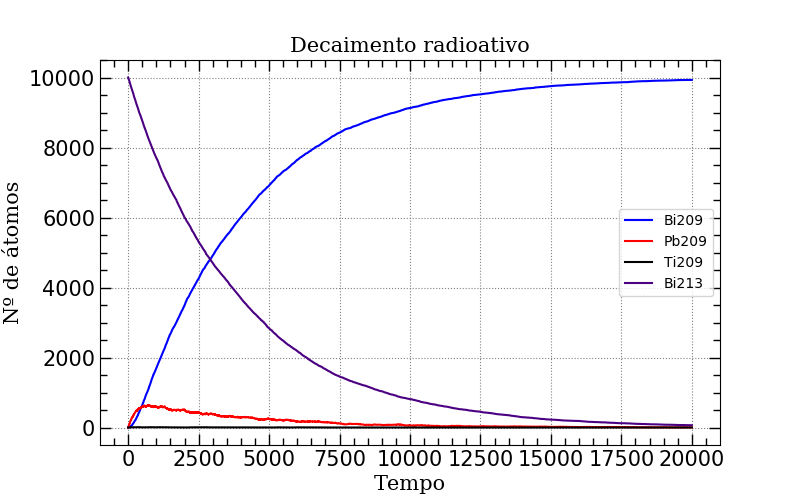

In [8]:
plt.figure(figsize=(8,5))

plt.plot(t, Bi209_list, color='blue', label='Bi209')
plt.plot(t, Pb209_list, color='red', label='Pb209')
plt.plot(t, Ti209_list, color='black', label='Ti209')
plt.plot(t, Bi213_list, color='indigo', label='Bi213')
plt.title('Decaimento radioativo', family='serif', fontsize=15)
plt.xlabel('Tempo', family='serif', fontsize=15)
plt.ylabel('Nº de átomos', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

$\text{ }$

## Problema 3

Vamos realizar uma simulação do movimento browniano. Para isso, vamos definir uma estrutura quadricular de área $L^{2}$ e representaremos as posição das partículas do gás (que está confinado em nossa estrutura) por dois números $i,j\in[0,L-1]\subset\mathbb{N}$. As partículas são livres para se mover nas seguintes direções que são escolhidas de forma randômica:

* cima;
* baixo;
* esquerda;
* direita.

Começamos definindo as constantes que usaremos no problema:

In [9]:
L = 101

i = 50
j = 50

Agora iniciamos nossa simulação:

In [ ]:
d = vp.canvas()
s = vp.sphere()

s.pos = vp.vector(i,j,0)
d.autoscale = False

for t in np.arange(1e6):
    vp.rate(30)
    s.pos = vp.vector(i-50, j-50, 0)
    a = rd.randint(1,4)
    
    if a == 1: 
        if i == L: continue
        i += 1
    elif a == 2:
        if i == 0: continue
        i -= 1
    elif a == 3:
        if j == L: continue
        j += 1
    elif a == 4:
        if j == 0: continue
        j -= 1

Agora, basta executarmos a célula acima e iremos executar a nossa animação. Como o ambiente do `IPython` não lida muito bem com animações, essa célula não será executada neste `Notebook`. Dessa forma, caso o leitor deseje executar o código e verificar a animação, basta executar o arquivo `Brownian_motion.py` em um compilador Python.

$\text{ }$

## Problema 4

### Letra a)

Definimos uma função que chamaremos de `p(x)`. Tal função irá implementar a aplicação de uma distribuição exponencial na geração de números aleatórios:

$$\boxed{p(x)=\mu\exp{(-\mu x)}}$$

In [10]:
def p(x):
    return (-1/mu)*np.log(1-x)

Vamos usar a nossa função criada acima para gerar $N=10^{4}$ números aleatórios. Para isso, utilizaremos $\mu=1.0$ e criaremos um array vazio para armazenas os valores calculados:

In [11]:
N = 10000
mu = 1.0
numbers = []

Agora geramos nossos números aleatórios seguindo uma distribuição exponencial:

In [12]:
for i in range(N):
    x = rd.random()
    numbers.append(p(x))

Por fim, vamos gerar um histograma das ocorrências desses números:

<IPython.core.display.Javascript object>


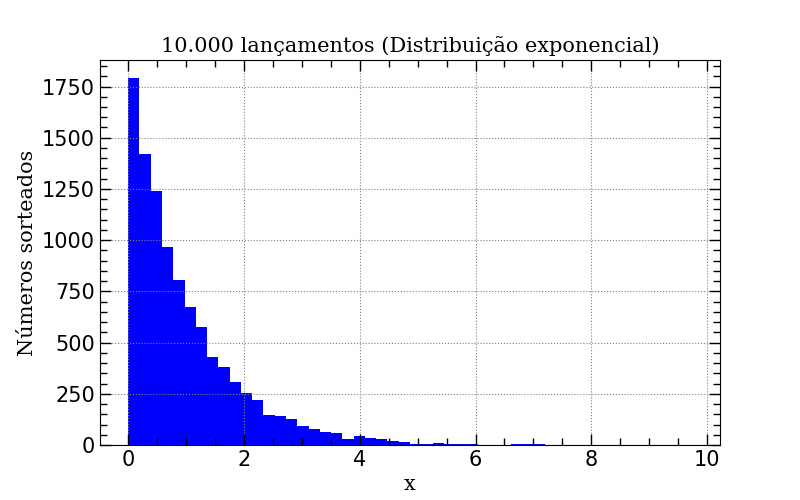

In [13]:
plt.figure(figsize=(8,5))

plt.hist(numbers, color='blue', bins=50)
plt.title('10.000 lançamentos (Distribuição exponencial)', family='serif', fontsize=15)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel('Números sorteados', family='serif', fontsize=15)
opt_plot()

### Letra b)

Vamos fazer o mesmo que fizemos no item anterior, mas dessa vez vamos usar uma distribuição gaussiana:

$$\boxed{p(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\Bigg(-\frac{x^{2}}{2\sigma^{2}}\Bigg)}$$

Começamos definindo a nossa função gaussiana `gaussian(a,b)`:

In [14]:
def gaussian(a,b):
    p = np.sqrt(-2*(sigma**2)*np.log(1-a))
    theta = 2*np.pi*b
    
    return p,theta

def xy(p,theta):
    x, y = p*np.cos(theta), p*np.sin(theta)
    
    return x,y

Vamos agora definir $\sigma=1.0$ e aplicar a nossa função na geração de $N=10^{4}$ números aleatórios e criar um array vazio para armazenar os valores calculados:

In [15]:
N = 10000
sigma = 1.0
numsx = []
numsy = []

Agora geramos nossos números aleatórios seguindo uma distribuição gaussiana:

In [16]:
for i in range(N):
    a, b = rd.random(), rd.random()
    p, theta = gaussian(a,b)
    x,y = xy(p,theta)
    numsx.append(x)
    numsy.append(y)

Por fim, vamos ao histograma:

<IPython.core.display.Javascript object>


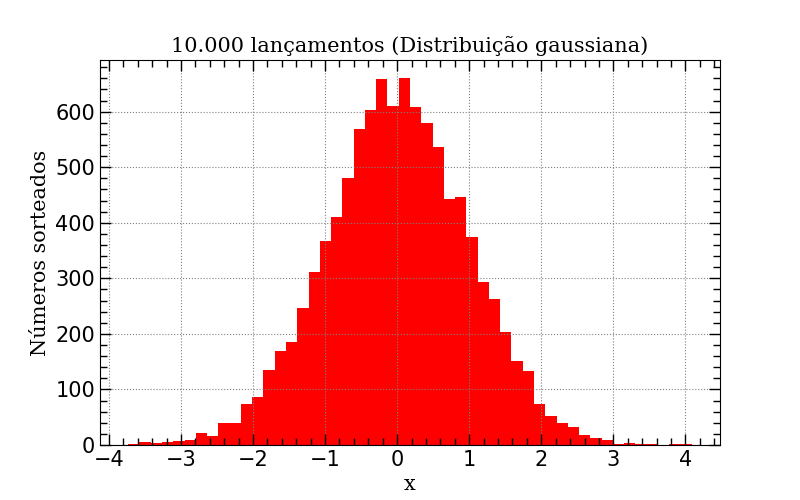

In [17]:
plt.figure(figsize=(8,5))

plt.hist(numsx, color='red', bins=50)
plt.title('10.000 lançamentos (Distribuição gaussiana)', family='serif', fontsize=15)
plt.xlabel('x', family='serif', fontsize=15)
plt.ylabel('Números sorteados', family='serif', fontsize=15)
opt_plot()

$\text{ }$

## Problema 5

### Letra a)

Considere a seguinte integral:

$$I=\int_{0}^{2}\sin^{2}{\Bigg[\frac{1}{x(2-x)}\Bigg]dx}$$

Desejamos avaliar o a integral $I$ usando o método de Monte Carlo de "erro ou acerto" com $10^{4}$ pontos. Para isso, vamos primeiramente definir uma função para retornar a função que está sendo integrada:

In [18]:
def f(x):
    return np.sin(1/x/(2-x))**2

Definimos agora os limites de integração, o passo e o número de pontos:

In [19]:
a = 0
b = 2
A = (b-a)*1
N = 10000

Definimos $x$ e $y$:

In [20]:
x = np.random.random(N)*2
y = np.random.random(N)

Agora avaliamos a nossa integral junto com o erro estimado:

In [21]:
fx = f(x)
count = np.sum(fx > y)

I1 = A*count/N
sigma1 = np.sqrt(I1*(A-I1)/N)

Por fim, vamos printar nosso resultado:

In [22]:
print('I = {0} + {1:5f}'.format(I1,sigma1))

I = 1.46 + 0.008879


### Letra b)

Vamos estimar o valor da integral novamente usando agora o método do valor médio com o mesmo número de pontos:

In [23]:
I2 = (b-a)/N*np.sum(fx)
var2 = np.sum(fx**2)/N - (np.sum(fx)/N)**2
sigma2 = (b-a)*np.sqrt(var2/N)

Por fim, vamos printar a nossa estimativa junto o erro estimado:

In [24]:
print('I = {0} + {1:5f}'.format(I2,sigma2))

I = 1.45125888425815 + 0.005287


$\text{ }$